In [50]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist, cifar10, cifar100

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

import numpy as np
import random

import matplotlib.pyplot as plt

In [51]:
# This should print something along the lines of '2.0.0-rc1'
tf.__version__

'2.4.0'

In [52]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [53]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [54]:
# MNIST
labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [55]:
# Pre-process data
img_rows, img_cols, channels = 28, 28, 1 # 32, 32, 3
num_classes = 10

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape((-1, img_rows, img_cols, channels))
x_test = x_test.reshape((-1, img_rows, img_cols, channels))

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print("Data shapes", x_test.shape, y_test.shape, x_train.shape, y_train.shape)

Data shapes (10000, 28, 28, 1) (10000, 10) (60000, 28, 28, 1) (60000, 10)


In [69]:
model_000 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name='mdoel_000')

# l2: 0.01
model_001 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_011 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
], name='model_011')

model_111 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# l2: 0.1
model_002 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_022 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(10, activation='softmax')
], name='model_022')

model_222 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# l2: 1.0
model_003 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(1.0)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_033 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(1.0)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(1.0)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_333 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(1.0)),    
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(1.0)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(1.0)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [70]:
model_000.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_001.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_011.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_111.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_002.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_022.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_222.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_003.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_033.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model_333.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [71]:
history_000 = model_000.fit(x_train, y_train, epochs=10, verbose=0)
history_001 = model_001.fit(x_train, y_train, epochs=10, verbose=0)
history_011 = model_011.fit(x_train, y_train, epochs=10, verbose=0)
history_111 = model_111.fit(x_train, y_train, epochs=10, verbose=0)
history_002 = model_002.fit(x_train, y_train, epochs=10, verbose=0)
history_022 = model_022.fit(x_train, y_train, epochs=10, verbose=0)
history_222 = model_222.fit(x_train, y_train, epochs=10, verbose=0)
history_003 = model_003.fit(x_train, y_train, epochs=10, verbose=0)
history_033 = model_033.fit(x_train, y_train, epochs=10, verbose=0)
history_333 = model_333.fit(x_train, y_train, epochs=10, verbose=0)

In [72]:
print("000 : ", history_000.history['accuracy'][-3:])
print("001 : ", history_001.history['accuracy'][-3:])
print("011 : ", history_011.history['accuracy'][-3:])
print("111 : ", history_111.history['accuracy'][-3:])
print("002 : ", history_002.history['accuracy'][-3:])
print("022 : ", history_022.history['accuracy'][-3:])
print("222 : ", history_222.history['accuracy'][-3:])
print("003 : ", history_003.history['accuracy'][-3:])
print("033 : ", history_033.history['accuracy'][-3:])
print("333 : ", history_333.history['accuracy'][-3:])

000 :  [0.9902499914169312, 0.991183340549469, 0.9926333427429199]
001 :  [0.9890166521072388, 0.9903500080108643, 0.9913166761398315]
011 :  [0.982200026512146, 0.9834499955177307, 0.9855833053588867]
111 :  [0.9445666670799255, 0.946233332157135, 0.9468333125114441]
002 :  [0.9847833514213562, 0.9868999719619751, 0.9884333610534668]
022 :  [0.9639833569526672, 0.9659166932106018, 0.9681000113487244]
222 :  [0.8066666722297668, 0.809499979019165, 0.8149166703224182]
003 :  [0.9797000288963318, 0.9813833236694336, 0.9836666584014893]
033 :  [0.9049500226974487, 0.9097833037376404, 0.9168166518211365]
333 :  [0.11236666887998581, 0.11236666887998581, 0.11236666887998581]


In [73]:
# Assess base model accuracy on regular images
print("Model_000 Base accuracy on regular images:", model_000.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_001 Base accuracy on regular images:", model_001.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_011 Base accuracy on regular images:", model_011.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_111 Base accuracy on regular images:", model_111.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_002 Base accuracy on regular images:", model_002.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_022 Base accuracy on regular images:", model_022.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_222 Base accuracy on regular images:", model_222.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_003 Base accuracy on regular images:", model_003.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_033 Base accuracy on regular images:", model_033.evaluate(x=x_test, y=y_test, verbose=0))
print("Model_333 Base accuracy on regular images:", model_333.evaluate(x=x_test, y=y_test, verbose=0))

Model_000 Base accuracy on regular images: [0.10840249061584473, 0.9736999869346619]
Model_001 Base accuracy on regular images: [0.08101356029510498, 0.9786999821662903]
Model_011 Base accuracy on regular images: [0.11962022632360458, 0.9757000207901001]
Model_111 Base accuracy on regular images: [0.37381604313850403, 0.9506000280380249]
Model_002 Base accuracy on regular images: [0.09405718743801117, 0.9782999753952026]
Model_022 Base accuracy on regular images: [0.21911023557186127, 0.9587000012397766]
Model_222 Base accuracy on regular images: [1.047797441482544, 0.819100022315979]
Model_003 Base accuracy on regular images: [0.12669238448143005, 0.9732999801635742]
Model_033 Base accuracy on regular images: [0.45642974972724915, 0.9108999967575073]
Model_333 Base accuracy on regular images: [2.301227331161499, 0.11349999904632568]


In [84]:
# Function to create adversarial pattern
def adversarial_pattern(image, label, model):

    image = tf.cast(image, tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        
        label = label.reshape(1, -1)

        loss = tf.keras.losses.CategoricalCrossentropy()
        loss = loss(label, prediction)
    
    gradient = tape.gradient(loss, image)
    
    signed_grad = tf.sign(gradient)
    
    return signed_grad

model: model_022
five
three


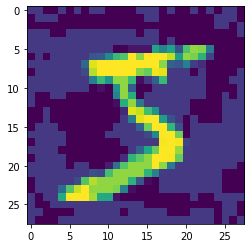

In [77]:
# Create a signle adversarial example
image = x_train[0]
image_label = y_train[0]

perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), image_label, model_022).numpy()
adversarial = image + perturbations * 0.1

print(labels[model_022.predict(image.reshape((1, img_rows, img_cols, channels))).argmax()])
print(labels[model_022.predict(adversarial).argmax()])

if channels == 1:
    plt.imshow(adversarial.reshape((img_rows, img_cols)))
else:
    plt.imshow(adversarial.reshape((img_rows, img_cols, channels)))

plt.show()

In [82]:
# Adversarial data generator
def generate_adversarials(batch_size, model):
    while True:
        x = []
        y = []
        for batch in range(batch_size):
            N = random.randint(0, 100)

            label = y_train[N]
            image = x_train[N]
            
            perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label, model).numpy()
            
            epsilon = 0.1
            adversarial = image + perturbations * epsilon
            
            x.append(adversarial)
            y.append(y_train[N])
        
        
        x = np.asarray(x).reshape((batch_size, img_rows, img_cols, channels))
        y = np.asarray(y)
        
        yield x, y

model: model_011
model: model_011
model: model_011
model: model_011
model: model_011
model: model_011
Prediction: two , Truth: one


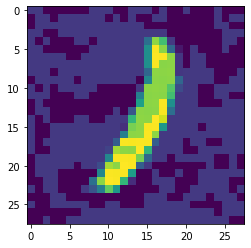

Prediction: seven , Truth: four


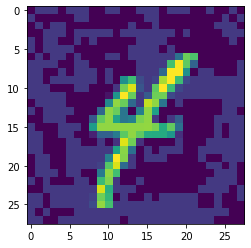

Prediction: nine , Truth: four


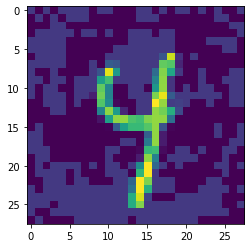

Prediction: two , Truth: one


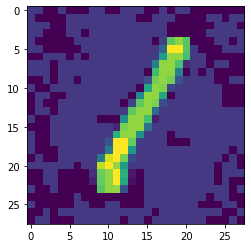

Prediction: three , Truth: nine


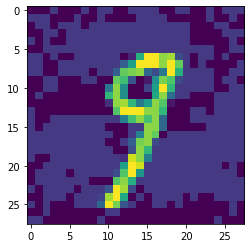

In [79]:
# Generate and visualize 5 adversarial images
adversarials, correct_labels = next(generate_adversarials(5, model_011))
for adversarial, correct_label in zip(adversarials, correct_labels):
    print('Prediction:', labels[model_011.predict(adversarial.reshape((1, img_rows, img_cols, channels))).argmax()], ', Truth:', labels[correct_label.argmax()])
    if channels == 1:
        plt.imshow(adversarial.reshape(img_rows, img_cols))
    else:
        plt.imshow(adversarial)
    plt.show()

model: model_022
model: model_022
model: model_022
model: model_022
model: model_022
model: model_022
Prediction: three , Truth: one


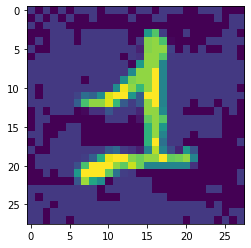

Prediction: three , Truth: nine


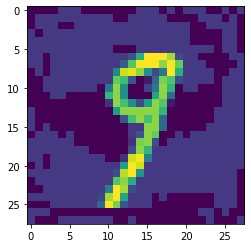

Prediction: five , Truth: nine


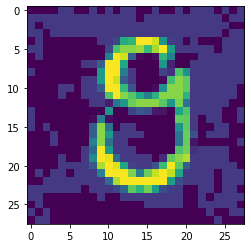

Prediction: eight , Truth: zero


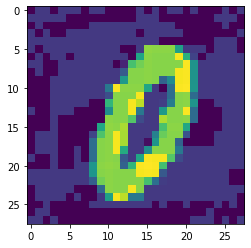

Prediction: eight , Truth: four


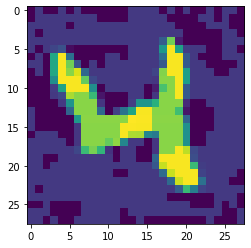

In [80]:
# Generate and visualize 5 adversarial images
adversarials, correct_labels = next(generate_adversarials(5, model_022))
for adversarial, correct_label in zip(adversarials, correct_labels):
    print('Prediction:', labels[model_022.predict(adversarial.reshape((1, img_rows, img_cols, channels))).argmax()], ', Truth:', labels[correct_label.argmax()])
    if channels == 1:
        plt.imshow(adversarial.reshape(img_rows, img_cols))
    else:
        plt.imshow(adversarial)
    plt.show()

Prediction: nine , Truth: one


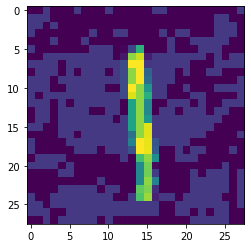

Prediction: eight , Truth: nine


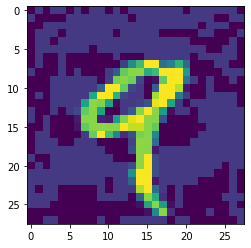

Prediction: seven , Truth: zero


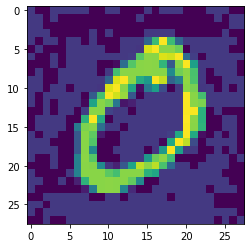

Prediction: seven , Truth: six


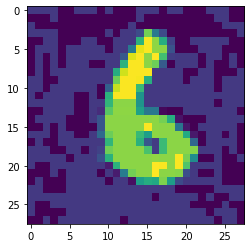

Prediction: nine , Truth: seven


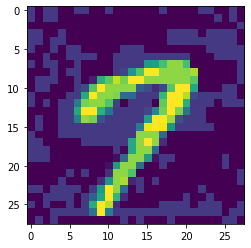

In [49]:
# Generate and visualize 5 adversarial images
adversarials, correct_labels = next(generate_adversarials(5, model_033))
for adversarial, correct_label in zip(adversarials, correct_labels):
    print('Prediction:', labels[model_033.predict(adversarial.reshape((1, img_rows, img_cols, channels))).argmax()], ', Truth:', labels[correct_label.argmax()])
    if channels == 1:
        plt.imshow(adversarial.reshape(img_rows, img_cols))
    else:
        plt.imshow(adversarial)
    plt.show()

In [87]:
# Generate adversarial data
# x_adversarial, y_adversarial = np.load("x_adv_10k.npy"), np.load("y_adv_10k.npy")
x_adversarial_train, y_adversarial_train = next(generate_adversarials(3000, model_011))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(1000, model_011))
print(x_adversarial_test.shape, y_adversarial_test.shape)

KeyboardInterrupt: 

In [42]:
# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model_011.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [18.69663429260254, 0.19099999964237213]


In [43]:
# Generate adversarial data
# x_adversarial, y_adversarial = np.load("x_adv_10k.npy"), np.load("y_adv_10k.npy")
x_adversarial_train, y_adversarial_train = next(generate_adversarials(3000, model_022))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(1000, model_022))

In [44]:
# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model_022.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [17.923717498779297, 0.11500000208616257]


|model|regular_acc|adversarial_acc|
|-----|-----------|---------------|
|model_000|||
